# Customer Segmentation Project

## Problem Statement
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Project Objectives
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

Data Dictionary:
- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler # to scale data using z-score
from scipy.spatial.distance import cdist # to compute distances
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import util

In [2]:
df = pd.read_excel("Credit+Card+Customer+Data.xlsx")

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
df.shape

(660, 7)

- The dataset has 660 rows with 7 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- All the features are numerical with integer data type

In [6]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in the dataset

In [7]:
df.duplicated().sum()

0

- There are no duplicate values in the dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


- The customers made a minimum of 0 visits to the bank per year, with a maximum of 5 visits and an average of 2.4 visits.
- The customers possessed a minimum of 1 credit card, while some customers had a maximum of 10 credit cards.
- The customers made a minimum of 0 visits or online logins per year, with a maximum of 15 visits/logins and an average of 2.61 visits/logins.
- The customers made a minimum of 0 calls to the bank or its customer service department per year, with a maximum of 10 calls and an average of 3.6 calls.
- The customers had a minimum average credit limit of USD3,000 for all credit cards, with a maximum of USD200,000 and an average of USD34,574.

In [9]:
# Dropping the Sl_No and Customer Key features as they are not needed
df.drop(["Sl_No", "Customer Key"], axis = 1, inplace = True)

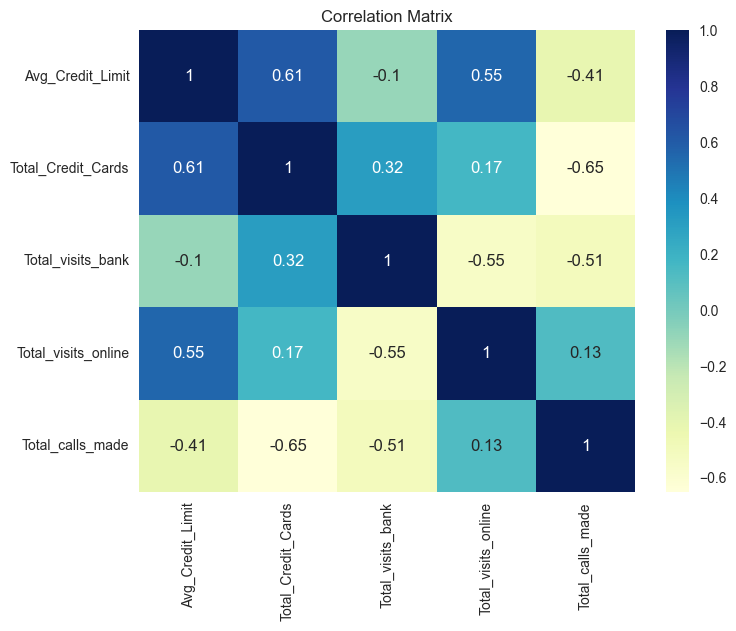

In [10]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

- The plot suggests that the average credit limit is moderately correlated to total number of credit cards that customers possess and the total number of visits or online logins made by the customers (yearly).

In [11]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

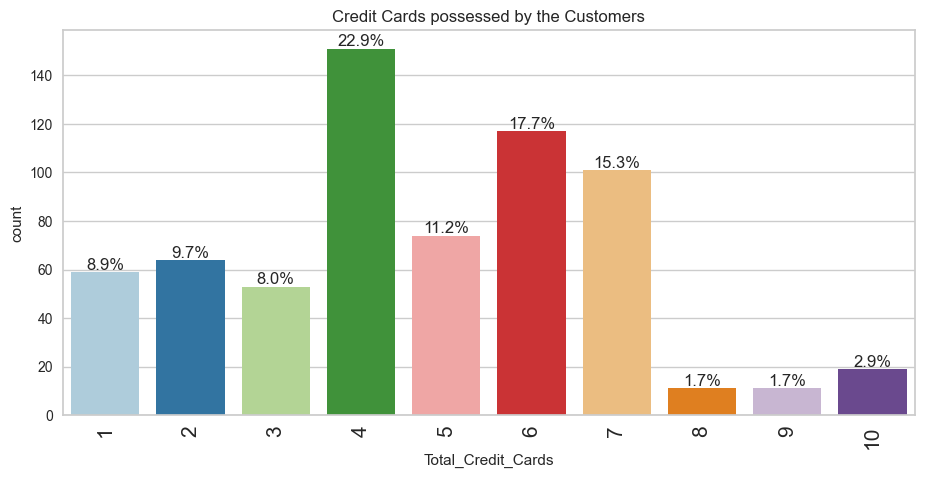

In [12]:
util.labeled_barplot(data = df, feature = "Total_Credit_Cards", perc = True, title = "Credit Cards possessed by the Customers")

- The plot shows that Customers who possessed 4 Credit Cards are most represented (22.9%) while customers with 8 and 9 Credit Cards are the least represented (1.7%).

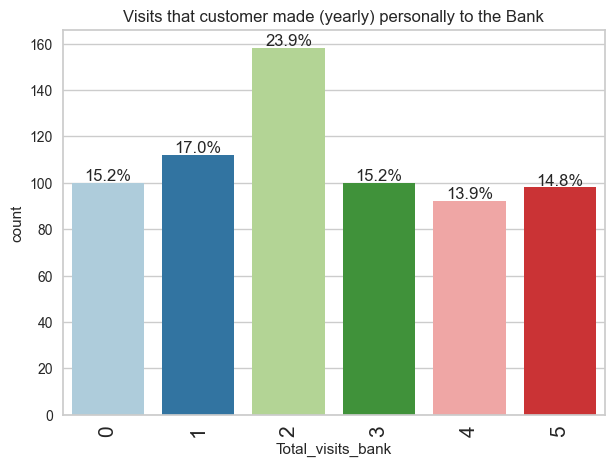

In [13]:
util.labeled_barplot(data = df, feature = "Total_visits_bank", perc = True, title = "Visits that customer made (yearly) personally to the Bank")

- The plot shows that customers who made visits twice a year personally to the Bank are the most represented in the customer base while customer who made visits four times a year personally to the Bank are the least represented.

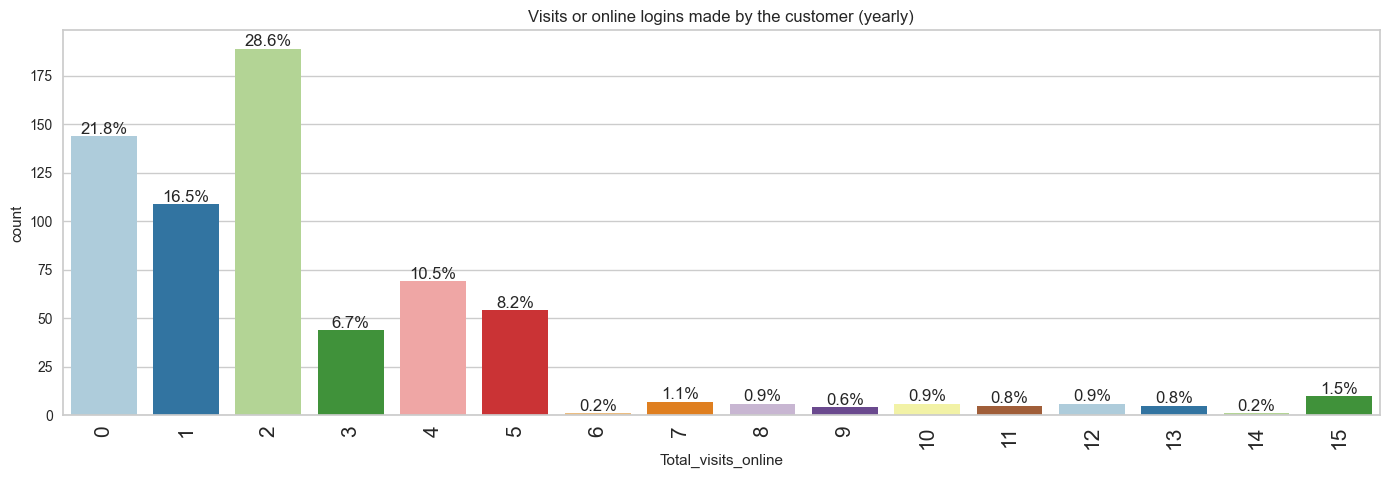

In [14]:
util.labeled_barplot(data = df, feature = "Total_visits_online", perc = True, title = "Visits or online logins made by the customer (yearly)")

- The plot shows that customers who made online visits/logins twice a year are more represented (28.6%) in the customer base while customers who made online visits/logins 14 times a year are the least represented (0.2%). It's also noteworthy that about 21% of the customer base made no online visits/logins which the marketing team should investigate why they have not been using the online platform. Customers should be encouraged to take advantage of the online banking.

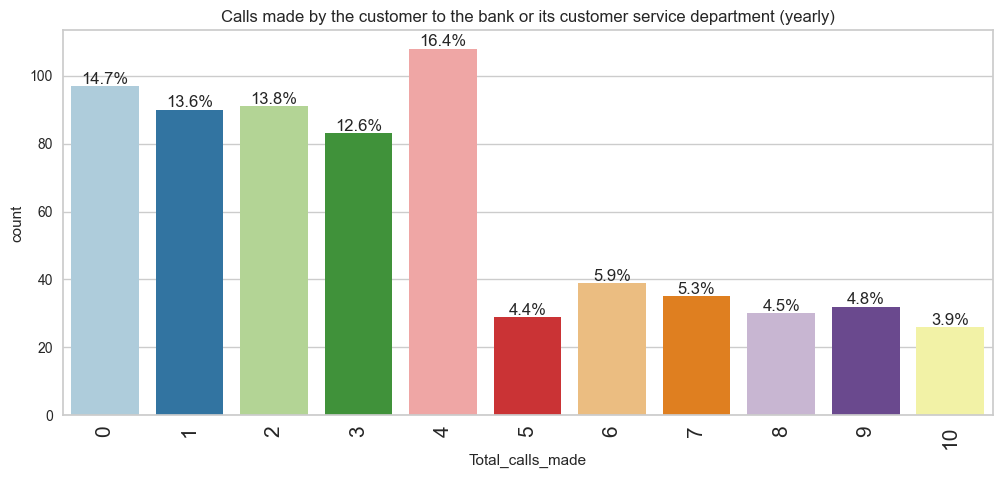

In [15]:
util.labeled_barplot(data = df, feature = "Total_calls_made", perc = True, title = "Calls made by the customer to the bank or its customer service department (yearly)")

- The plot shows that customers who made calls to the bank or its customer service department 4 times a year are more represented in the customer base of the bank while customers who made calls to the bank or its customer service department 10 times a year are the least represented.

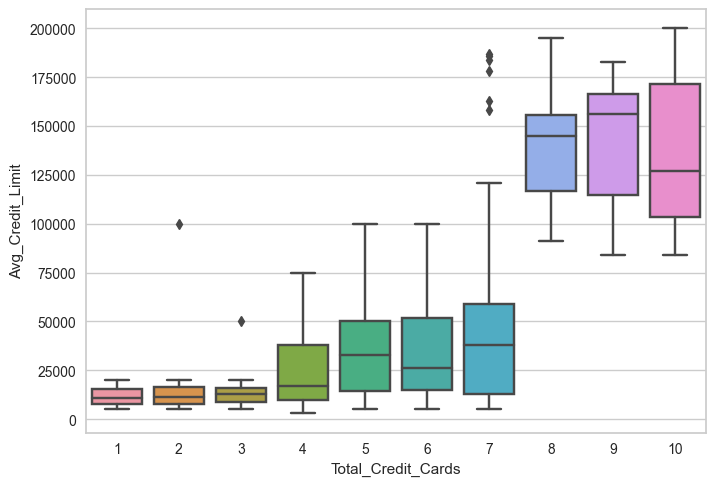

In [16]:
sns.boxplot(data = df, x = "Total_Credit_Cards", y = "Avg_Credit_Limit");

- The plot shows that Customers who possess greater number of credit cards have higher average credit limit for all their credit cards compared to customers who have lesser number of credit cards. This simply implies that the higher the number of credit cards customers possess, the higher the average credit limit for all their credit cards.

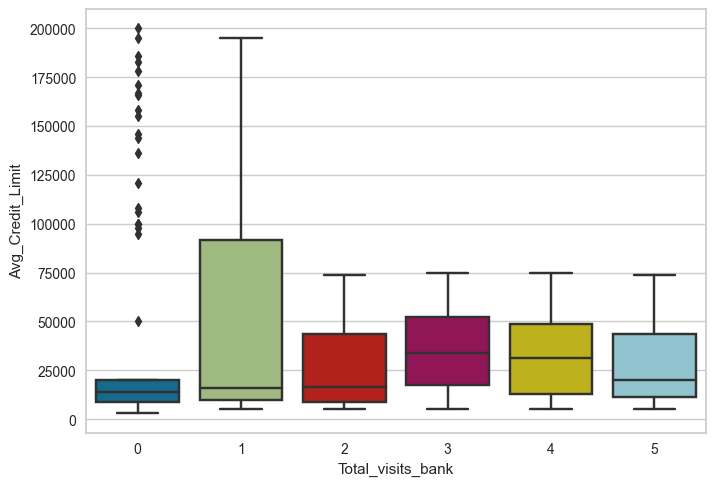

In [17]:
sns.boxplot(data = df, x = "Total_visits_bank", y = "Avg_Credit_Limit");

- Customers who visited the Bank one time a year have higher average credit limit for all their credit cards while customers who did not visit the bank at all have the least average credit limit for all their credit cards.

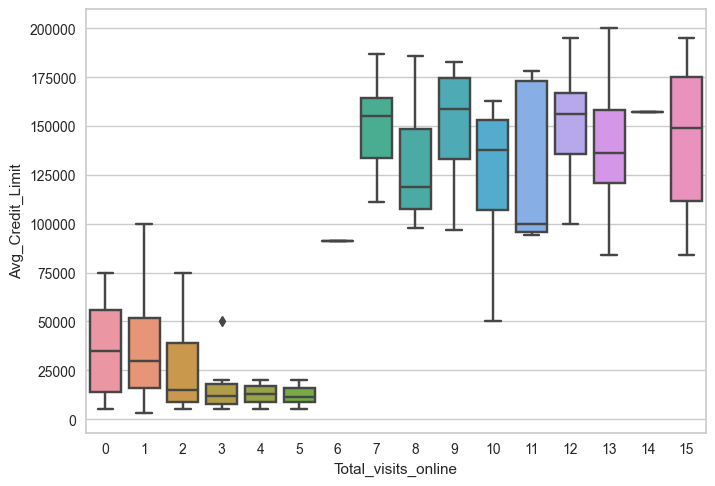

In [18]:
sns.boxplot(data = df, x = "Total_visits_online", y = "Avg_Credit_Limit");

- Customers who made at least 6 online visits/logins a year have higher average credit limit for all their credit cards than customers who made less than 6 online visits/logins a year.

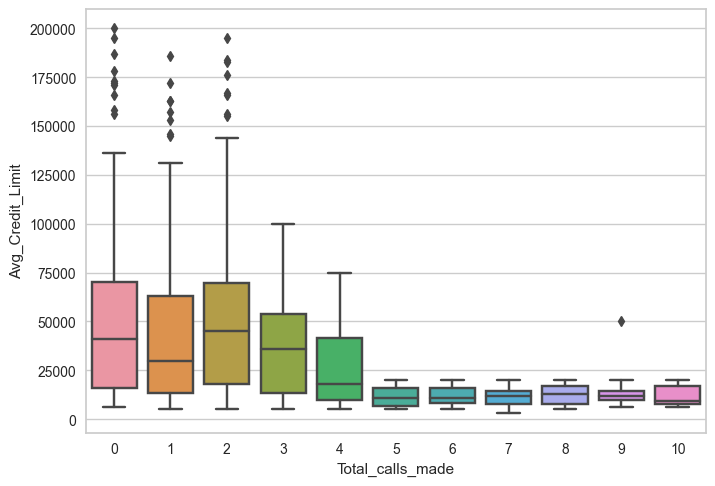

In [19]:
sns.boxplot(data = df, x = "Total_calls_made", y = "Avg_Credit_Limit");

- Customers who made calls less than 5 times a year have higher average credit limit for all their credit cards than customers who made calls more than 5 times a year.

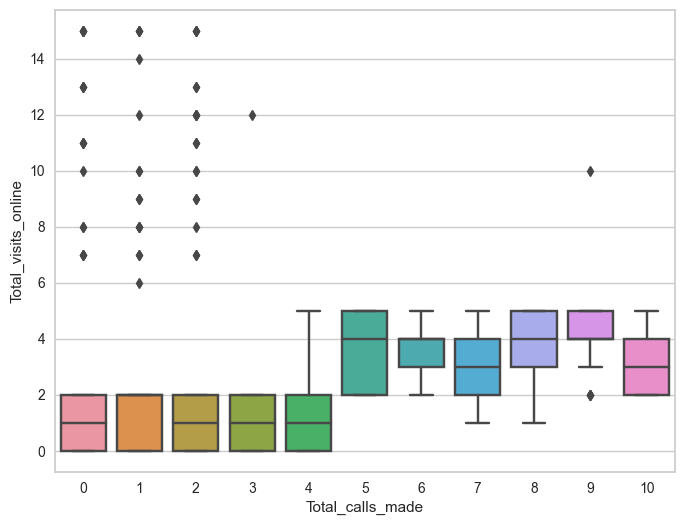

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x = "Total_calls_made", y = "Total_visits_online");

- The plot shows that the customers who made more online visits/logins also made more calls to the bank or its customer service department (yearly).

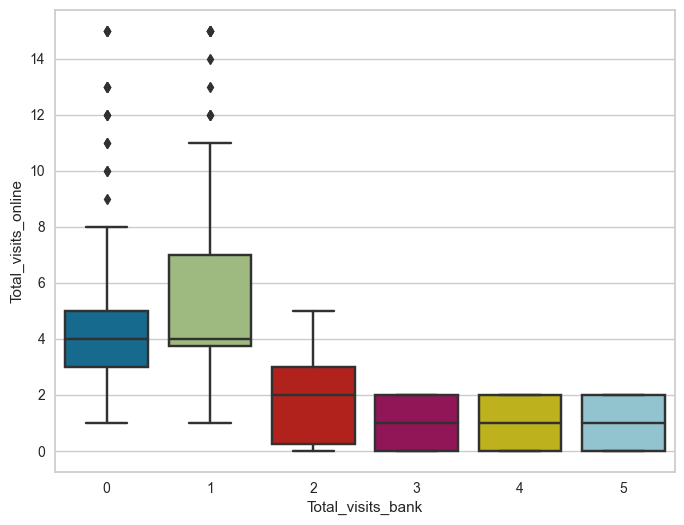

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x = "Total_visits_bank", y = "Total_visits_online");

- The plot shows that the customers who made more online visits/logins made lesser visits to the bank yearly. This means more awareness programme should be done to educate especially about 21.8% customers who made no online visits/logins throughout the year.

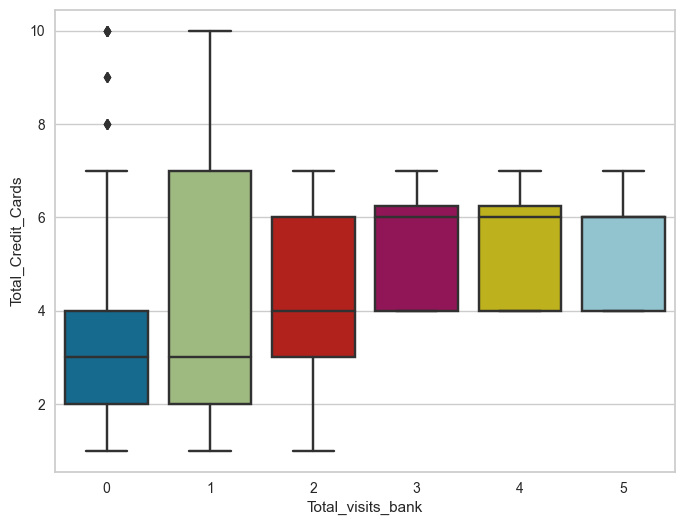

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x = "Total_visits_bank", y = "Total_Credit_Cards");

- The plot shows that customers with more credit cards made more visits personally to the bank. The lesser the number of credit cards the customers possess, the lesser the number of visits they made (yearly) personally to the bank.

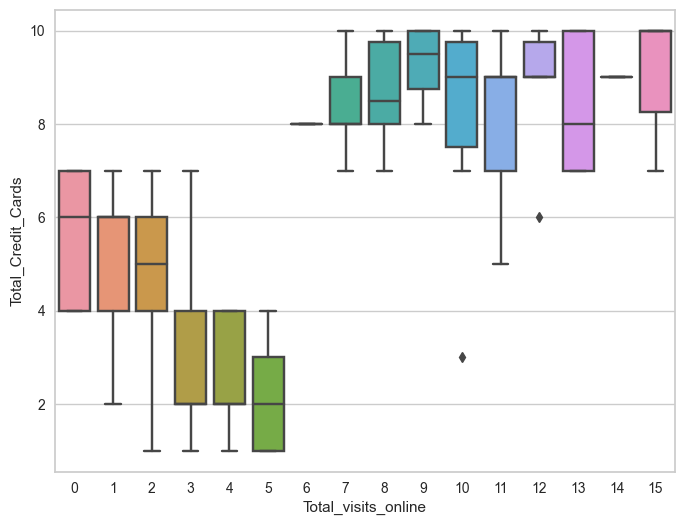

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x = "Total_visits_online", y = "Total_Credit_Cards");

- Customers with more number of credit cards made more online visits/logins yearly than those with lesser number of credit cards.

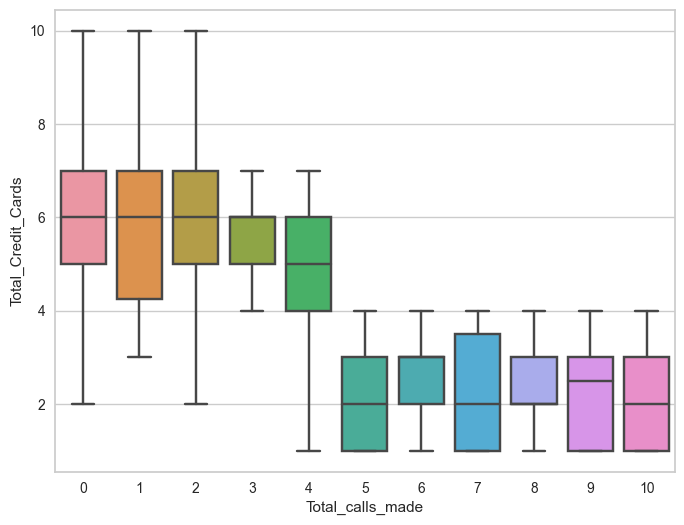

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x = "Total_calls_made", y = "Total_Credit_Cards");

- Customers with more number of credit cards made lesser calls to the bank or the customer service department yearly that those with lesser number of credit cards.

In [25]:
# # Select the features for clustering
# features = ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
# X = df[features]

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Build KMeans model
# kmeans = KMeans(n_clusters=3, random_state=42, n_init = "auto")
# kmeans.fit(X_scaled)

# # Build DBSCAN model
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan.fit(X_scaled)

# # Get the cluster labels
# kmeans_labels = kmeans.labels_
# dbscan_labels = dbscan.labels_

# # Add the cluster labels to the original DataFrame
# df['KMeans Cluster'] = kmeans_labels
# df['DBSCAN Cluster'] = dbscan_labels

# # Boxplot of clusters for KMeans
# plt.figure(figsize=(8, 6))
# for cluster in sorted(df['KMeans Cluster'].unique()):
#     cluster_data = df[df['KMeans Cluster'] == cluster][features]
#     plt.boxplot(cluster_data.values, labels=features)
#     plt.title(f'KMeans Cluster {cluster}')
#     plt.show()

# # Boxplot of clusters for DBSCAN
# plt.figure(figsize=(8, 6))
# for cluster in sorted(df['DBSCAN Cluster'].unique()):
#     if cluster == -1:
#         continue  # Skip noise points in DBSCAN
#     cluster_data = df[df['DBSCAN Cluster'] == cluster][features]
#     plt.boxplot(cluster_data.values, labels=features)
#     plt.title(f'DBSCAN Cluster {cluster}')
#     plt.show()

In [27]:
# y_pred = kmeans.predict(X_scaled)
# silhouette_score(X_scaled, y_pred)

In [32]:
# features = ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
# X = df[features]

Number of Clusters: 1 \Average Distortion: 27070.75829859924
Number of Clusters: 2 \Average Distortion: 16140.749020201496
Number of Clusters: 3 \Average Distortion: 8630.989840103693
Number of Clusters: 4 \Average Distortion: 6277.718120452092
Number of Clusters: 5 \Average Distortion: 5390.50502540509
Number of Clusters: 6 \Average Distortion: 4627.484163464493
Number of Clusters: 7 \Average Distortion: 4353.871726580121
Number of Clusters: 8 \Average Distortion: 3113.68064564553


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

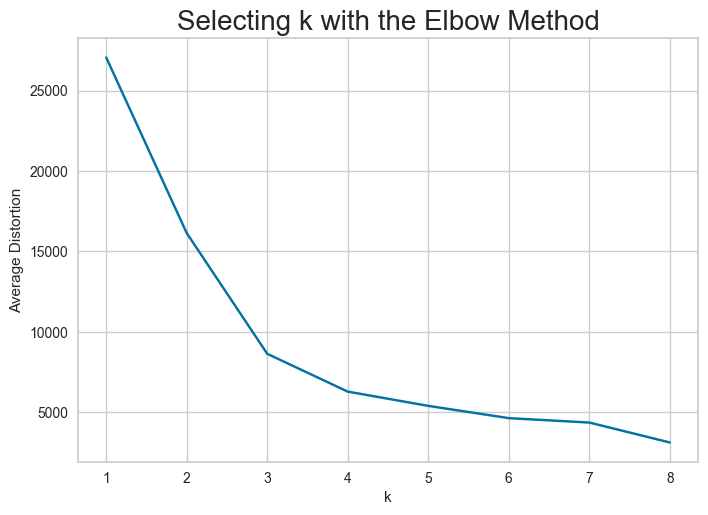

In [36]:
clusters = range(1, 9)
meanDistortions = [] # Create an empty list

for k in clusters:
    model = KMeans(n_clusters=k, n_init = "auto")
    model.fit(df)
    prediction = model.predict(df)
    distortion = (
        sum(np.min(cdist(df, model.cluster_centers_, "euclidean"), axis = 1)) 
        / df.shape[0]
    )
    
    meanDistortions.append(distortion)
    print("Number of Clusters:", k, "\Average Distortion:", distortion)
    
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize = 20)

For n_clusters = 2, silhouette score is 0.6980226451267207
For n_clusters = 3, silhouette score is 0.7187172255928896
For n_clusters = 4, silhouette score is 0.7161946076996266
For n_clusters = 5, silhouette score is 0.7051922285808032
For n_clusters = 6, silhouette score is 0.7033910231652406
For n_clusters = 7, silhouette score is 0.6222445473482158
For n_clusters = 8, silhouette score is 0.6205098227848508
For n_clusters = 9, silhouette score is 0.5879846678870828


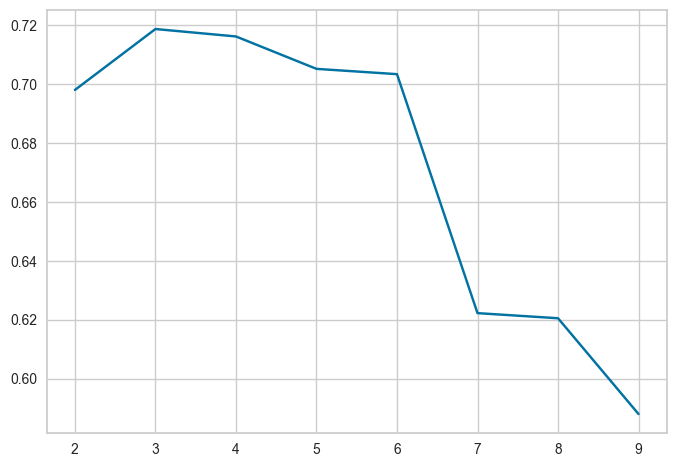

In [37]:
cluster_list = list(range(2, 10))
sil_score = [] # Create an empty list

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, n_init = "auto")
    preds = clusterer.fit_predict((df))
    score = silhouette_score(df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    
plt.plot(cluster_list, sil_score)

In [38]:
# Select the features for clustering
features = ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init = "auto")
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [40]:
df["kmeans_clusters"] = kmeans.labels_

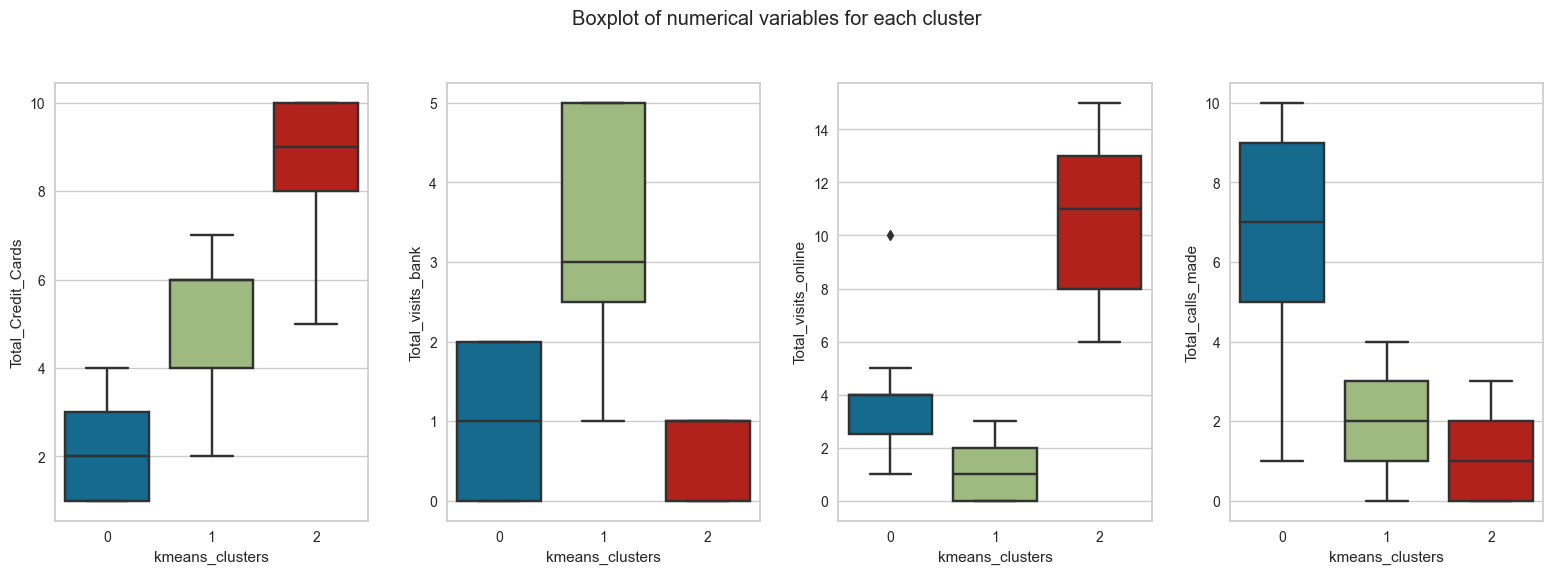

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii], y = df[features[counter]], x=df["kmeans_clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [42]:
# Select the features for clustering
features = ["Avg_Credit_Limit", 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init = "auto")
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [43]:
df["kmeans_clusters"] = kmeans.labels_

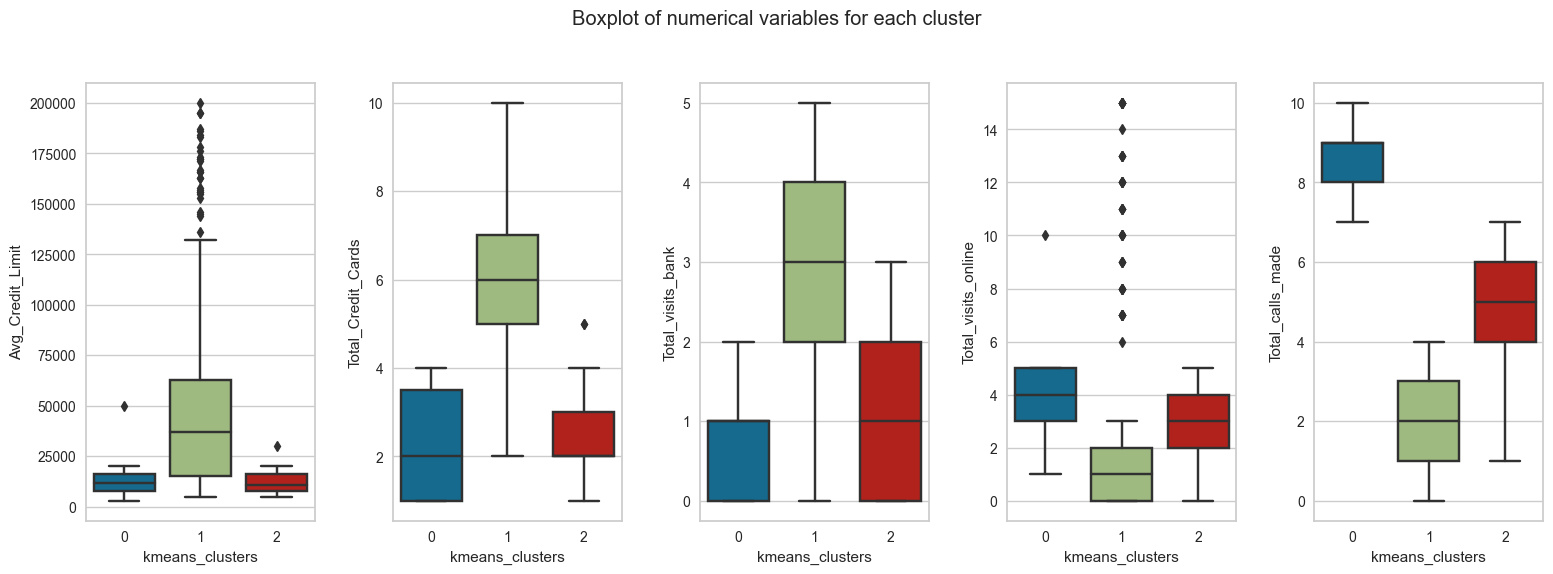

In [46]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y = df[features[counter]], x=df["kmeans_clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)